In [ ]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
dates=[210918,210911,210904,210828,210821,210814,210807,210731,210724,210717,210710]
df=pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210925.txt')
for i in dates:
    temp= pd.read_csv(f"http://web.mta.info/developers/data/nyct/turnstile/turnstile_{i}.txt")
    df= pd.concat([df, temp])
    #load the files into pandas dataframe

In [ ]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,00:00:00,REGULAR,7637026,2613455
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,04:00:00,REGULAR,7637036,2613457
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,08:00:00,REGULAR,7637047,2613478
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,12:00:00,REGULAR,7637104,2613524
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,16:00:00,REGULAR,7637236,2613561
...,...,...,...,...,...,...,...,...,...,...,...
209683,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,05:00:00,REGULAR,5554,585
209684,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:00:00,REGULAR,5554,585
209685,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:37:06,REGULAR,5554,585
209686,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,13:00:00,REGULAR,5554,585


In [ ]:
from sqlalchemy import  *
engine=create_engine('sqlite:///MTA_data.db')
df.to_sql('MTAdata',engine,if_exists='replace', index=False)

In [ ]:
all_tables = engine.table_names()
print(all_tables)

['MTAdata']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


In [ ]:
df1= pd.read_sql('select * from MTAdata ;', engine)
df1

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,00:00:00,REGULAR,7637026,2613455
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,04:00:00,REGULAR,7637036,2613457
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,08:00:00,REGULAR,7637047,2613478
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,12:00:00,REGULAR,7637104,2613524
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,16:00:00,REGULAR,7637236,2613561
...,...,...,...,...,...,...,...,...,...,...,...
2514583,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,05:00:00,REGULAR,5554,585
2514584,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:00:00,REGULAR,5554,585
2514585,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:37:06,REGULAR,5554,585
2514586,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,13:00:00,REGULAR,5554,585


In [ ]:
df["Date_Time"] =pd.to_datetime(df['DATE'] + ' ' + df['TIME'])
df
# Take the date and time fields into a single datetime column

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,00:00:00,REGULAR,7637026,2613455,2021-09-18 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,04:00:00,REGULAR,7637036,2613457,2021-09-18 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,08:00:00,REGULAR,7637047,2613478,2021-09-18 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,12:00:00,REGULAR,7637104,2613524,2021-09-18 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,16:00:00,REGULAR,7637236,2613561,2021-09-18 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
209683,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,05:00:00,REGULAR,5554,585,2021-07-09 05:00:00
209684,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:00:00,REGULAR,5554,585,2021-07-09 09:00:00
209685,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:37:06,REGULAR,5554,585,2021-07-09 09:37:06
209686,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,13:00:00,REGULAR,5554,585,2021-07-09 13:00:00


In [ ]:
(df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "Date_Time"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False))
#show duplicate values

,C/A,UNIT,SCP,STATION,Date_Time,ENTRIES
2494754,S101,R070,00-00-02,ST. GEORGE,2021-09-12 20:00:00,2
514889,J037,R009,00-00-02,121 ST,2021-09-13 08:00:00,2
2267541,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-25 20:00:00,2
2267542,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-26 00:00:00,2
2494682,S101,R070,00-00-02,ST. GEORGE,2021-09-01 00:00:00,2
...,...,...,...,...,...,...
838163,N128,R200,00-00-03,EUCLID AV,2021-09-06 16:00:00,1
838164,N128,R200,00-00-03,EUCLID AV,2021-09-06 20:00:00,1
838165,N128,R200,00-00-03,EUCLID AV,2021-09-07 00:00:00,1
838166,N128,R200,00-00-03,EUCLID AV,2021-09-07 04:00:00,1


In [ ]:
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "Date_Time"],inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "Date_Time"], inplace=True)
#drop duplicate values

In [ ]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time
210399,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,21:00:00,REGULAR,5554,646,2021-09-24 21:00:00
210398,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,17:00:00,REGULAR,5554,646,2021-09-24 17:00:00
210397,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,13:00:00,REGULAR,5554,645,2021-09-24 13:00:00
210396,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,09:00:00,REGULAR,5554,645,2021-09-24 09:00:00
210395,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,05:00:00,REGULAR,5554,645,2021-09-24 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,16:00:00,REGULAR,7596572,2597289,2021-07-03 16:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,12:00:00,REGULAR,7596466,2597262,2021-07-03 12:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,08:00:00,REGULAR,7596422,2597208,2021-07-03 08:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,04:00:00,REGULAR,7596412,2597189,2021-07-03 04:00:00


In [ ]:
(df.groupby(["C/A", "UNIT", "SCP", "STATION", "Date_Time"]).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False))
#chick duplicate values is exist

,C/A,UNIT,SCP,STATION,Date_Time,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-07-03 00:00:00,1
1676313,R139,R031,04-00-01,34 ST-PENN STA,2021-09-09 12:00:00,1
1676306,R139,R031,04-00-01,34 ST-PENN STA,2021-09-08 08:00:00,1
1676307,R139,R031,04-00-01,34 ST-PENN STA,2021-09-08 12:00:00,1
1676308,R139,R031,04-00-01,34 ST-PENN STA,2021-09-08 16:00:00,1
...,...,...,...,...,...,...
838156,N128,R200,00-00-03,EUCLID AV,2021-09-05 12:00:00,1
838157,N128,R200,00-00-03,EUCLID AV,2021-09-05 16:00:00,1
838158,N128,R200,00-00-03,EUCLID AV,2021-09-05 20:00:00,1
838159,N128,R200,00-00-03,EUCLID AV,2021-09-06 00:00:00,1


In [ ]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'Date_Time'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
df = df.drop(["LINENAME", "DIVISION",  "EXITS", "DESC"], axis=1, errors="ignore")
df
#drop the coulmns 

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,Date_Time
210399,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/24/2021,21:00:00,5554,2021-09-24 21:00:00
210398,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/24/2021,17:00:00,5554,2021-09-24 17:00:00
210397,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/24/2021,13:00:00,5554,2021-09-24 13:00:00
210396,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/24/2021,09:00:00,5554,2021-09-24 09:00:00
210395,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/24/2021,05:00:00,5554,2021-09-24 05:00:00
...,...,...,...,...,...,...,...,...
4,A002,R051,02-00-00,59 ST,07/03/2021,16:00:00,7596572,2021-07-03 16:00:00
3,A002,R051,02-00-00,59 ST,07/03/2021,12:00:00,7596466,2021-07-03 12:00:00
2,A002,R051,02-00-00,59 ST,07/03/2021,08:00:00,7596422,2021-07-03 08:00:00
1,A002,R051,02-00-00,59 ST,07/03/2021,04:00:00,7596412,2021-07-03 04:00:00


In [ ]:
df.shape

(2514466, 8)

In [ ]:
df=df.sort_values(["C/A", "UNIT", "SCP", "STATION", "Date_Time"])
#sort the values

In [ ]:
df.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,Date_Time
0,A002,R051,02-00-00,59 ST,07/03/2021,00:00:00,7596401,2021-07-03 00:00:00
1,A002,R051,02-00-00,59 ST,07/03/2021,04:00:00,7596412,2021-07-03 04:00:00
2,A002,R051,02-00-00,59 ST,07/03/2021,08:00:00,7596422,2021-07-03 08:00:00
3,A002,R051,02-00-00,59 ST,07/03/2021,12:00:00,7596466,2021-07-03 12:00:00
4,A002,R051,02-00-00,59 ST,07/03/2021,16:00:00,7596572,2021-07-03 16:00:00


In [ ]:
df[["PREV_DATE", "PREV_ENTRIES"]] = (df.groupby(["C/A", "UNIT", "SCP", "STATION"])["Date_Time", "ENTRIES"].apply(lambda grp: grp.shift(1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,Date_Time,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,07/03/2021,00:00:00,7596401,2021-07-03 00:00:00,NaT,NaN
1,A002,R051,02-00-00,59 ST,07/03/2021,04:00:00,7596412,2021-07-03 04:00:00,2021-07-03 00:00:00,7596401.0
2,A002,R051,02-00-00,59 ST,07/03/2021,08:00:00,7596422,2021-07-03 08:00:00,2021-07-03 04:00:00,7596412.0
3,A002,R051,02-00-00,59 ST,07/03/2021,12:00:00,7596466,2021-07-03 12:00:00,2021-07-03 08:00:00,7596422.0
4,A002,R051,02-00-00,59 ST,07/03/2021,16:00:00,7596572,2021-07-03 16:00:00,2021-07-03 12:00:00,7596466.0


In [ ]:
df.tail()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,Date_Time,PREV_DATE,PREV_ENTRIES
210395,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/24/2021,05:00:00,5554,2021-09-24 05:00:00,2021-09-24 01:00:00,5554.0
210396,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/24/2021,09:00:00,5554,2021-09-24 09:00:00,2021-09-24 05:00:00,5554.0
210397,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/24/2021,13:00:00,5554,2021-09-24 13:00:00,2021-09-24 09:00:00,5554.0
210398,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/24/2021,17:00:00,5554,2021-09-24 17:00:00,2021-09-24 13:00:00,5554.0
210399,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/24/2021,21:00:00,5554,2021-09-24 21:00:00,2021-09-24 17:00:00,5554.0


In [ ]:
#Drop the rows for the earliest date in the df
df.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [ ]:
df.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,Date_Time,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,07/03/2021,04:00:00,7596412,2021-07-03 04:00:00,2021-07-03 00:00:00,7596401.0
2,A002,R051,02-00-00,59 ST,07/03/2021,08:00:00,7596422,2021-07-03 08:00:00,2021-07-03 04:00:00,7596412.0
3,A002,R051,02-00-00,59 ST,07/03/2021,12:00:00,7596466,2021-07-03 12:00:00,2021-07-03 08:00:00,7596422.0
4,A002,R051,02-00-00,59 ST,07/03/2021,16:00:00,7596572,2021-07-03 16:00:00,2021-07-03 12:00:00,7596466.0
5,A002,R051,02-00-00,59 ST,07/03/2021,20:00:00,7596715,2021-07-03 20:00:00,2021-07-03 16:00:00,7596572.0


In [ ]:
df.shape

(2509441, 10)

In [ ]:
 #Let's see how many stations have this problem

(df[df["ENTRIES"] < df["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         503
A014  R081  02-00-00  49 ST                1
A049  R088  02-05-00  CORTLANDT ST        20
A066  R118  00-00-00  CANAL ST           502
A084  R125  01-03-02  BROAD ST             1
                                        ... 
R622  R123  00-00-00  FRANKLIN AV        511
R633  R068  00-00-01  VAN SICLEN AV        1
R646  R110  01-00-02  FLATBUSH AV-B.C      1
R730  R431  00-00-04  EASTCHSTER/DYRE    445
S101  R070  00-00-02  ST. GEORGE           6
Length: 212, dtype: int64

In [ ]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
df["DAILY_ENTRIES"] = df.apply(get_daily_counts, axis=1, max_counter=100000)

393216 1.0
5 150038.0
193 8049630.0
10 468616.0
167790067 702272.0
151 5610355.0
149 132517.0
35 9769328.0
33565227 188201.0
31 8724126.0
458766 2578.0
6 106396.0
164 150473.0
393216 728.0
66 3272795.0
64 124319.0
5671 4298891.0
0 117440512.0
83 367525.0
15848006 2216515.0
2216520 15848006.0
10487784 2024.0
2024 10487784.0
10 500619.0
327680 7577112.0
67109632 14.0
327682 67109640.0
15 67109632.0
14 1198448.0
37 305512.0
46 5405537.0
23 705357551.0
16777220 1037161.0
6 16034831.0
183 197843.0
458788 271020.0
327680 786526.0
327680 0.0
34 6214051.0
28 656520.0
37 1950780.0
173 15689534.0
290 239100.0
2718 174019.0
174023 2718.0
609994 1021.0
1195 609994.0
26911 332760.0
332770 26911.0
0 117404.0
0 182617.0
430827 73.0
5 430827.0
131640 408512.0
408706 131640.0
265384 54590.0
54602 265384.0
89 624773.0
430827 9370.0
9429 430827.0
75 226654.0
108 277883.0
4 118847.0
1 146227.0
70 319276.0
8 1255797.0
21 120061.0
5 993961.0
7 201369.0
9 380650.0
11123659 4624026.0
5 11123659.0
1891101745 1

In [ ]:
df.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,Date_Time,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,07/03/2021,04:00:00,7596412,2021-07-03 04:00:00,2021-07-03 00:00:00,7596401.0,11.0
2,A002,R051,02-00-00,59 ST,07/03/2021,08:00:00,7596422,2021-07-03 08:00:00,2021-07-03 04:00:00,7596412.0,10.0
3,A002,R051,02-00-00,59 ST,07/03/2021,12:00:00,7596466,2021-07-03 12:00:00,2021-07-03 08:00:00,7596422.0,44.0
4,A002,R051,02-00-00,59 ST,07/03/2021,16:00:00,7596572,2021-07-03 16:00:00,2021-07-03 12:00:00,7596466.0,106.0
5,A002,R051,02-00-00,59 ST,07/03/2021,20:00:00,7596715,2021-07-03 20:00:00,2021-07-03 16:00:00,7596572.0,143.0


In [ ]:
station_daily = df.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()


,STATION,DATE,DAILY_ENTRIES
0,1 AV,07/03/2021,4490.0
1,1 AV,07/04/2021,5794.0
2,1 AV,07/05/2021,6683.0
3,1 AV,07/06/2021,7456.0
4,1 AV,07/07/2021,7784.0


In [ ]:
station_totals = station_daily.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()


In [ ]:
station_totals

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,3823522.0
1,34 ST-HERALD SQ,2861965.0
2,GRD CNTRL-42 ST,2678312.0
3,JOURNAL SQUARE,2633776.0
4,42 ST-PORT AUTH,2590344.0
...,...,...
374,BEACH 44 ST,24211.0
375,BEACH 98 ST,19190.0
376,BEACH 105 ST,12276.0
377,BROAD CHANNEL,9707.0


In [ ]:
top_five_stations = station_totals.head(5)

In [ ]:
top_five_stations

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,3823522.0
1,34 ST-HERALD SQ,2861965.0
2,GRD CNTRL-42 ST,2678312.0
3,JOURNAL SQUARE,2633776.0
4,42 ST-PORT AUTH,2590344.0


Text(0.5, 0, 'ENTRIES')

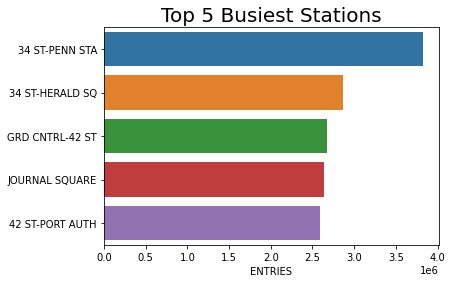

In [ ]:
plot= sns.barplot(y='STATION', x='DAILY_ENTRIES', data=top_five_stations)
plot.set_title('Top 5 Busiest Stations',fontsize = 20)
plot.set_ylabel('')
plot.set_xlabel('ENTRIES')

In [ ]:
plt.savefig('barplot.png',transparent=True, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [ ]:
station_daily = df.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,07/03/2021,4490.0
1,1 AV,07/04/2021,5794.0
2,1 AV,07/05/2021,6683.0
3,1 AV,07/06/2021,7456.0
4,1 AV,07/07/2021,7784.0


In [ ]:
mask = (
(df["STATION"] == "34 ST-PENN STA"))

station1 =df[mask]
station1

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,Date_Time,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
55747,N067,R012,00-00-00,34 ST-PENN STA,07/03/2021,04:00:00,262877,2021-07-03 04:00:00,2021-07-03 00:00:00,262874.0,3.0
55748,N067,R012,00-00-00,34 ST-PENN STA,07/03/2021,08:00:00,262887,2021-07-03 08:00:00,2021-07-03 04:00:00,262877.0,10.0
55749,N067,R012,00-00-00,34 ST-PENN STA,07/03/2021,12:00:00,262938,2021-07-03 12:00:00,2021-07-03 08:00:00,262887.0,51.0
55750,N067,R012,00-00-00,34 ST-PENN STA,07/03/2021,16:00:00,263036,2021-07-03 16:00:00,2021-07-03 12:00:00,262938.0,98.0
55751,N067,R012,00-00-00,34 ST-PENN STA,07/03/2021,20:00:00,263082,2021-07-03 20:00:00,2021-07-03 16:00:00,263036.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...
140413,R142,R293,01-06-01,34 ST-PENN STA,09/24/2021,06:00:00,68097697,2021-09-24 06:00:00,2021-09-24 02:00:00,68097697.0,0.0
140414,R142,R293,01-06-01,34 ST-PENN STA,09/24/2021,10:00:00,68097722,2021-09-24 10:00:00,2021-09-24 06:00:00,68097697.0,25.0
140415,R142,R293,01-06-01,34 ST-PENN STA,09/24/2021,14:00:00,68097772,2021-09-24 14:00:00,2021-09-24 10:00:00,68097722.0,50.0
140416,R142,R293,01-06-01,34 ST-PENN STA,09/24/2021,18:00:00,68097854,2021-09-24 18:00:00,2021-09-24 14:00:00,68097772.0,82.0


In [ ]:
station1["DATE"]=pd.to_datetime(station1["DATE"])
station1['WEEKDAY'] = station1['DATE'].dt.day_name()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
station1

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,Date_Time,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,WEEKDAY
55747,N067,R012,00-00-00,34 ST-PENN STA,2021-07-03,04:00:00,262877,2021-07-03 04:00:00,2021-07-03 00:00:00,262874.0,3.0,Saturday
55748,N067,R012,00-00-00,34 ST-PENN STA,2021-07-03,08:00:00,262887,2021-07-03 08:00:00,2021-07-03 04:00:00,262877.0,10.0,Saturday
55749,N067,R012,00-00-00,34 ST-PENN STA,2021-07-03,12:00:00,262938,2021-07-03 12:00:00,2021-07-03 08:00:00,262887.0,51.0,Saturday
55750,N067,R012,00-00-00,34 ST-PENN STA,2021-07-03,16:00:00,263036,2021-07-03 16:00:00,2021-07-03 12:00:00,262938.0,98.0,Saturday
55751,N067,R012,00-00-00,34 ST-PENN STA,2021-07-03,20:00:00,263082,2021-07-03 20:00:00,2021-07-03 16:00:00,263036.0,46.0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
140413,R142,R293,01-06-01,34 ST-PENN STA,2021-09-24,06:00:00,68097697,2021-09-24 06:00:00,2021-09-24 02:00:00,68097697.0,0.0,Friday
140414,R142,R293,01-06-01,34 ST-PENN STA,2021-09-24,10:00:00,68097722,2021-09-24 10:00:00,2021-09-24 06:00:00,68097697.0,25.0,Friday
140415,R142,R293,01-06-01,34 ST-PENN STA,2021-09-24,14:00:00,68097772,2021-09-24 14:00:00,2021-09-24 10:00:00,68097722.0,50.0,Friday
140416,R142,R293,01-06-01,34 ST-PENN STA,2021-09-24,18:00:00,68097854,2021-09-24 18:00:00,2021-09-24 14:00:00,68097772.0,82.0,Friday


In [ ]:
station_totals = station1.groupby(['STATION', 'WEEKDAY'])[['DAILY_ENTRIES']].sum().reset_index()
station_totals

,STATION,WEEKDAY,DAILY_ENTRIES
0,34 ST-PENN STA,Friday,589819.0
1,34 ST-PENN STA,Monday,564150.0
2,34 ST-PENN STA,Saturday,399329.0
3,34 ST-PENN STA,Sunday,354330.0
4,34 ST-PENN STA,Thursday,591568.0
5,34 ST-PENN STA,Tuesday,703793.0
6,34 ST-PENN STA,Wednesday,620533.0


In [ ]:
casts = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
station_totals['WEEKDAY'] = pd.Categorical(station_totals['WEEKDAY'], categories=casts, ordered=True)
station_totals = station_totals.sort_values('WEEKDAY')
print (station_totals)

          STATION    WEEKDAY  DAILY_ENTRIES
1  34 ST-PENN STA     Monday       564150.0
5  34 ST-PENN STA    Tuesday       703793.0
6  34 ST-PENN STA  Wednesday       620533.0
4  34 ST-PENN STA   Thursday       591568.0
0  34 ST-PENN STA     Friday       589819.0
2  34 ST-PENN STA   Saturday       399329.0
3  34 ST-PENN STA     Sunday       354330.0


Text(0.5, 0, 'Entries')

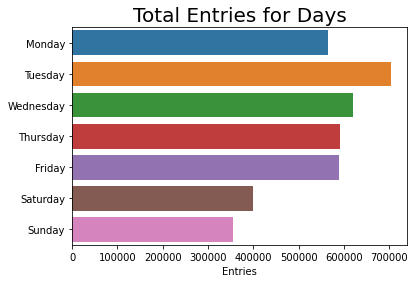

In [ ]:
#sns.histplot(data=station_totals, x="WEEKDAY",y="DAILY_ENTRIES")
plot= sns.barplot(x = 'DAILY_ENTRIES',y='WEEKDAY',data=station_totals )#palette='ch:2.5,-.2,dark=.2'
#plot.set_xticklabels(plot.get_xticklabels(), rotation= 40)
plot.set_title('Total Entries for Days',fontsize = 20)
plot.set_ylabel('')
plot.set_xlabel('Entries')